In [ ]:
from google.colab import drive
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
import matplotlib.pyplot as plt

drive.mount('/content/gdrive')

Mounted at /content/gdrive


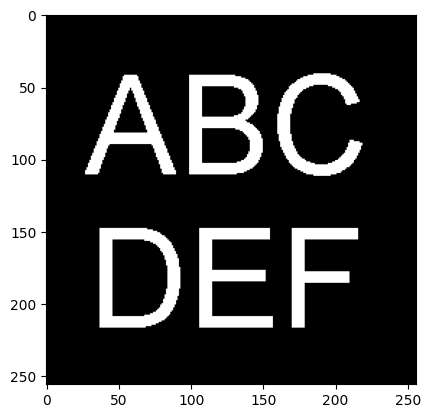

In [ ]:
img = cv2.imread('/content/gdrive/My Drive/IP/Images/abcdef.bmp')

gImg1 = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gImg1, cmap='gray')

In [ ]:
def saturation(val):
  if val > 255:
    return 255
  elif val < 0:
    return 0
  else:
    return val

In [ ]:
gPoint = np.zeros((gImg1.shape[0], gImg1.shape[1]), dtype = np.ubyte)

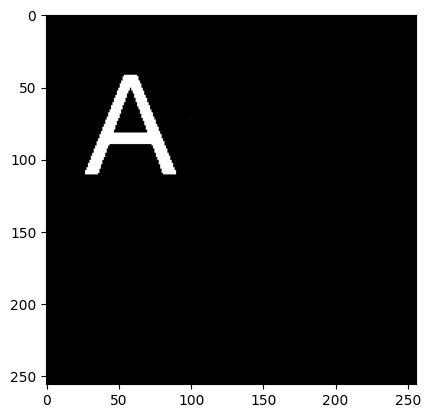

In [ ]:
img = cv2.imread('/content/gdrive/My Drive/IP/Images/a.bmp')

gImg2 = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gImg2, cmap='gray')

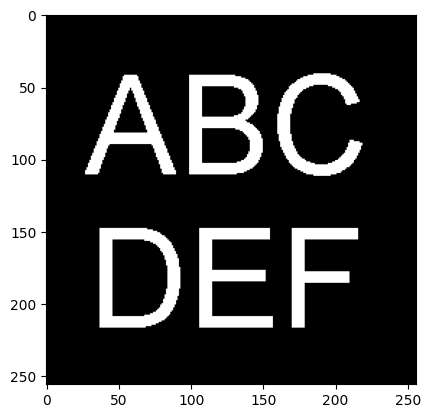

In [ ]:
for h in range(gImg1.shape[0]):
  for w in range(gImg1.shape[1]):
    #pointVal = np.int32(gImg1[h,w]) & np.int32(gImg2[h,w])
    pointVal = np.int32(gImg1[h,w]) | np.int32(gImg2[h,w])
    gPoint[h,w] = saturation(pointVal)

plt.imshow(gPoint, cmap = 'gray')

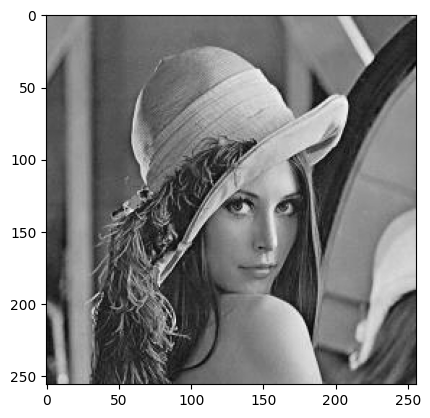

In [ ]:
img = cv2.imread('/content/gdrive/My Drive/IP/Images/lena256.jpg')

gImg2 = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gImg2, cmap='gray')

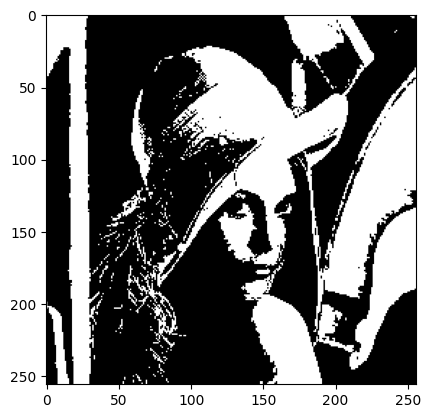

In [ ]:
planeNum = 8
planeValue = 1

for i in range(planeNum-1) :
  planeValue *= 2

for h in range(gImg2.shape[0]):
  for w in range(gImg2.shape[1]):
    imValue = gImg2[h,w]
    imValue = (int)(imValue/planeValue)
    if(imValue % 2 == 0) :
      imValue = 0
    else :
      imValue = 255
    gPoint[h,w] = imValue

plt.imshow(gPoint, cmap = 'gray')

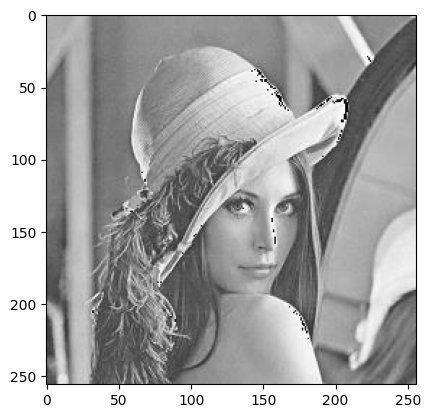

In [ ]:
gWaterMarker = gImg2.copy()

for h in range(gImg2.shape[0]):
  for w in range(gImg2.shape[1]):
    imValue = gImg1[h,w]
    if(imValue >= 128):
      if(gWaterMarker[h,w] %2 == 0):
        gWaterMarker[h,w] += 1
    else :
      if(gWaterMarker[h,w] % 2 == 1):
          gWaterMarker -= 1

plt.imshow(gWaterMarker, cmap = 'gray')